<a href="https://colab.research.google.com/github/Vinh1207/Phan-Cao-Vinh/blob/main/NhandienbenhcayngoCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Nhandienbenhcayngo/Train', target_size=(128,128), batch_size=32, class_mode='categorical')

Found 1470 images belonging to 4 classes.


In [6]:
test_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Nhandienbenhcayngo/Test', target_size=(128,128), batch_size=32, class_mode='categorical')

Found 475 images belonging to 4 classes.


In [7]:
training_set.class_indices

{'Corn Blight': 0,
 'Corn Common Rust': 1,
 'Corn Gray Spot': 2,
 'Corn Health': 3}

In [8]:
test_set.class_indices

{'Corn Blight': 0,
 'Corn Common Rust': 1,
 'Corn Gray Spot': 2,
 'Corn Health': 3}

In [9]:
x_train = np.concatenate([training_set.next()[0] for i in range(training_set.__len__())])
y_train = np.concatenate([training_set.next()[1] for i in range(training_set.__len__())])
print(x_train.shape)
print(y_train.shape)

(1470, 128, 128, 3)
(1470, 4)


In [11]:
x_test = np.concatenate([test_set.next()[0] for i in range(test_set.__len__())])
y_test = np.concatenate([test_set.next()[1] for i in range(test_set.__len__())])
print(x_test.shape)
print(y_test.shape)

(475, 128, 128, 3)
(475, 4)


In [12]:
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation="relu", input_shape=(128,128,3), padding="same"))
model.add(MaxPooling2D((2,2), padding="same"))
model.add(Conv2D(64, kernel_size=(3,3), activation="relu", padding="same"))
model.add(MaxPooling2D((2,2), padding="same"))
model.add(Conv2D(128, kernel_size=(3,3), activation="relu", padding="same"))
model.add(MaxPooling2D((2,2), padding="same"))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(4, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 128)      0

In [13]:
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

In [14]:
history = model.fit(x_train, y_train, batch_size=10, epochs=50, verbose=1)

Epoch 1/50
147/147 [==============================] - 57s 379ms/step - loss: 1.3982 - accuracy: 0.2973
Epoch 2/50
147/147 [==============================] - 56s 383ms/step - loss: 1.3848 - accuracy: 0.2939
Epoch 3/50
147/147 [==============================] - 57s 390ms/step - loss: 1.3821 - accuracy: 0.3061
Epoch 4/50
147/147 [==============================] - 55s 374ms/step - loss: 1.3758 - accuracy: 0.3122
Epoch 5/50
147/147 [==============================] - 55s 376ms/step - loss: 1.3675 - accuracy: 0.3272
Epoch 6/50
147/147 [==============================] - 54s 368ms/step - loss: 1.3406 - accuracy: 0.3415
Epoch 7/50
147/147 [==============================] - 54s 371ms/step - loss: 1.2913 - accuracy: 0.3721
Epoch 8/50
147/147 [==============================] - 54s 370ms/step - loss: 1.1851 - accuracy: 0.4327
Epoch 9/50
147/147 [==============================] - 57s 388ms/step - loss: 1.0373 - accuracy: 0.5109
Epoch 10/50
147/147 [==============================] - 54s 370ms/step - l

In [15]:
Score=model.evaluate(x_train,y_train,verbose=2)
print('Sai số: ', Score[0])
print('Độ chính xác: ', Score[1])

46/46 - 16s - loss: 7.5961e-07 - accuracy: 1.0000 - 16s/epoch - 349ms/step
Sai số:  7.596117939101532e-07
Độ chính xác:  1.0


<function matplotlib.pyplot.show(*args, **kw)>

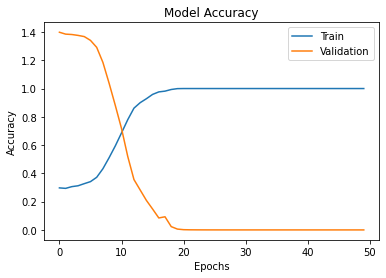

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

In [25]:
model.save("Nhan_dien_benh_cay_ngo_CNN.h5")

In [26]:
model_CNN=load_model("/content/drive/MyDrive/Colab Notebooks/Nhan_dien_benh_cay_ngo_CNN.h5")

In [27]:
class_names = ["Corn Blight", "Corn Common Rust", "Corn Gray Spot", "Corn Health"]

1/1 [==============================] - 0s 41ms/step
[[4.2114534e-17 1.2536068e-02 9.8746383e-01 1.5367260e-07]]
Đây là:  Corn Gray Spot
Độ chính xác:  0.98746383


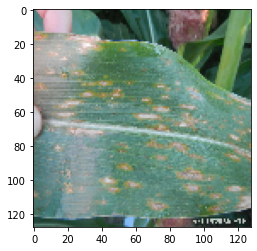

In [40]:
from tensorflow.keras.utils import load_img
from keras.utils.image_utils import img_to_array
import numpy as np

url = "/content/drive/MyDrive/NhandienbenhcayngoCNN/Train/Corn Gray Spot/Corn_Gray_Spot (13).jpg"
img = load_img(url, target_size=(128,128,3))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1, 128,128,3)
img = img.astype("float32")
img = img/255
img = img.reshape(-1, 128,128,3)

prediction = model_CNN.predict(img)
np.argmax(prediction, axis=1)
index = -1
max_value = -1

for i in range(0, len(prediction[0])):
  if max_value < prediction[0][i]:
    max_value = prediction[0][i]
    index = i
print(prediction)
print("Đây là: ", class_names[index])
print("Độ chính xác: ", max_value)

1/1 [==============================] - 0s 38ms/step
[[9.9997354e-01 1.0281087e-09 2.6413980e-05 5.3984346e-09]]
Đây là:  Corn Blight
Độ chính xác:  0.99997354


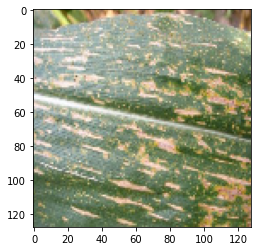

In [36]:
url = "/content/drive/MyDrive/NhandienbenhcayngoCNN/Train/Corn Blight/Corn_Blight (15).jpg"
img = load_img(url, target_size=(128,128,3))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1, 128,128,3)
img = img.astype("float32")
img = img/255
img = img.reshape(-1, 128,128,3)

prediction = model_CNN.predict(img)
np.argmax(prediction, axis=1)
index = -1
max_value = -1

for i in range(0, len(prediction[0])):
  if max_value < prediction[0][i]:
    max_value = prediction[0][i]
    index = i
print(prediction)
print("Đây là: ", class_names[index])
print("Độ chính xác: ", max_value)

1/1 [==============================] - 0s 38ms/step
[[4.0807249e-19 1.0000000e+00 1.0279686e-29 5.1609833e-14]]
Đây là:  Corn Common Rust
Độ chính xác:  1.0


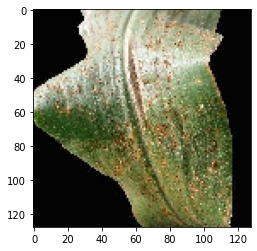

In [45]:
url = "/content/drive/MyDrive/NhandienbenhcayngoCNN/Train/Corn Common Rust/Corn_Common_Rust (95).JPG"
img = load_img(url, target_size=(128,128,3))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1, 128,128,3)
img = img.astype("float32")
img = img/255
img = img.reshape(-1, 128,128,3)

prediction = model_CNN.predict(img)
np.argmax(prediction, axis=1)
index = -1
max_value = -1

for i in range(0, len(prediction[0])):
  if max_value < prediction[0][i]:
    max_value = prediction[0][i]
    index = i
print(prediction)
print("Đây là: ", class_names[index])
print("Độ chính xác: ", max_value)

1/1 [==============================] - 0s 72ms/step
[[3.0838992e-04 1.8473540e-02 2.4146115e-02 9.5707190e-01]]
Đây là:  Corn Health
Độ chính xác:  0.9570719


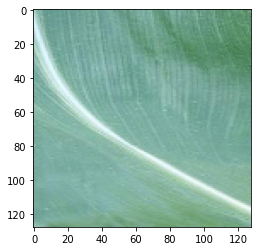

In [46]:
url = "/content/drive/MyDrive/NhandienbenhcayngoCNN/Train/Corn Health/Corn_Health (93).jpg"
img = load_img(url, target_size=(128,128,3))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1, 128,128,3)
img = img.astype("float32")
img = img/255
img = img.reshape(-1, 128,128,3)

prediction = model_CNN.predict(img)
np.argmax(prediction, axis=1)
index = -1
max_value = -1

for i in range(0, len(prediction[0])):
  if max_value < prediction[0][i]:
    max_value = prediction[0][i]
    index = i
print(prediction)
print("Đây là: ", class_names[index])
print("Độ chính xác: ", max_value)